In [6]:
import os

# Get the current working directory (root of running directory)
root_dir = os.getcwd()
print(root_dir)

/Users/adirblajwas/PycharmProjects/ProcessManagementProject/process_mining


In [7]:
import pandas as pd

LOG_PATH = "event_log.csv"     # adapt if needed
df = pd.read_csv(LOG_PATH, parse_dates=["start_time", "completion_time"])


In [8]:

# Basic clean-ups
df["duration_sec"] = (df["completion_time"] - df["start_time"]).dt.total_seconds()
df.sort_values(["case_id", "start_time"], inplace=True)

# ↓ pm4py expects the following column names
df.rename(columns={
    "case_id": "case:concept:name",
    "event_label": "concept:name",
    "start_time": "time:timestamp"
}, inplace=True)


In [9]:
df

,case:concept:name,task_id,concept:name,resource,time:timestamp,completion_time,diagnosis,duration_sec
0,0,0,emergency_patient,NaN,2018-01-01 05:16:56.386104,2018-01-01 05:16:56.386104,B1,0.000000
2,0,2,ER_treatment,ER_PRACTITIONER5,2018-01-01 05:16:56.386104,2018-01-01 07:10:22.713046,NaN,6806.326942
42,0,5,nursing,B_BED31,2018-01-01 07:10:22.713046,2018-01-01 18:00:00.000000,NaN,38977.286954
44,0,52,releasing,NaN,2018-01-01 18:00:00.000000,2018-01-01 18:00:00.000000,NaN,0.000000
1,1,1,emergency_patient,NaN,2018-01-01 05:46:40.580678,2018-01-01 05:46:40.580678,B1,0.000000
...,...,...,...,...,...,...,...,...
1513,372,1791,ER_treatment,ER_PRACTITIONER6,2018-01-10 18:20:09.944938,2018-01-10 20:53:51.124407,NaN,9221.179469
1516,373,1790,emergency_patient,NaN,2018-01-10 23:25:51.381910,2018-01-10 23:25:51.381910,B2,0.000000
1517,374,1805,emergency_patient,NaN,2018-01-10 23:26:26.101691,2018-01-10 23:26:26.101691,NaN,0.000000
1518,375,1807,emergency_patient,NaN,2018-01-10 23:50:48.629049,2018-01-10 23:50:48.629049,B1,0.000000


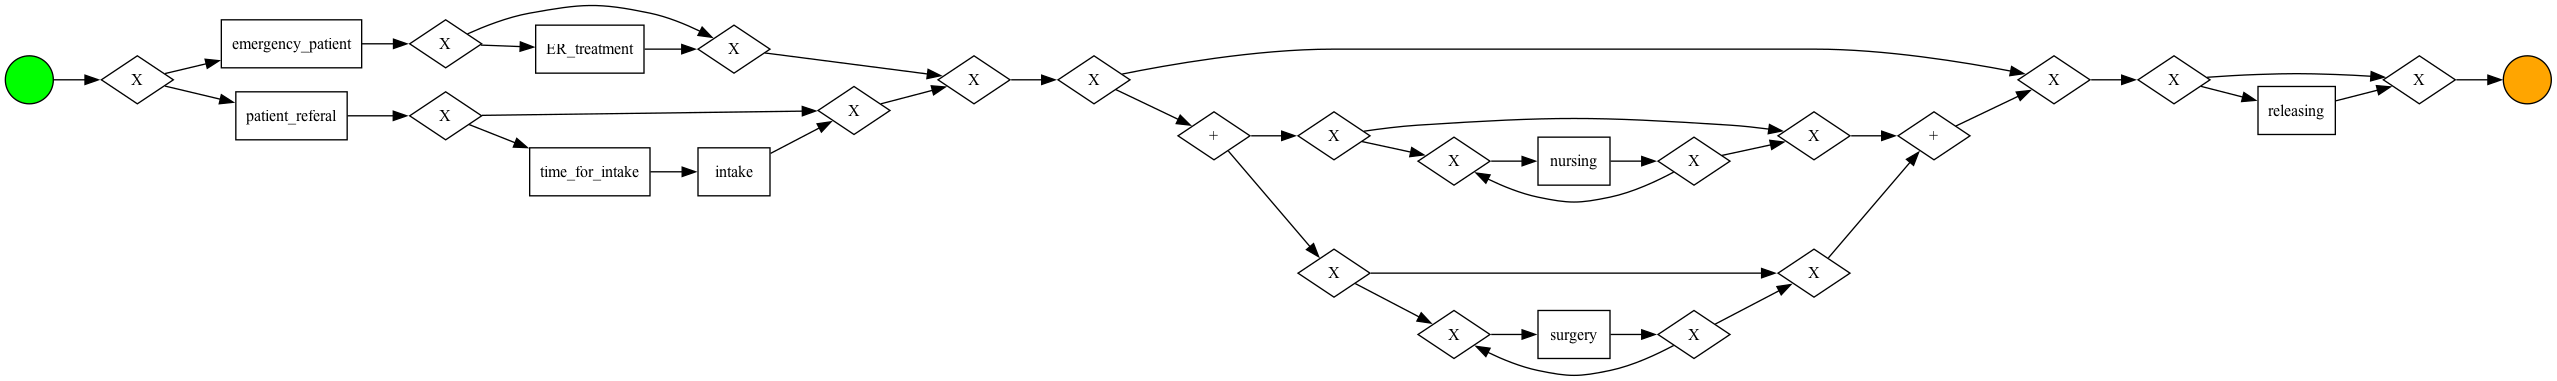

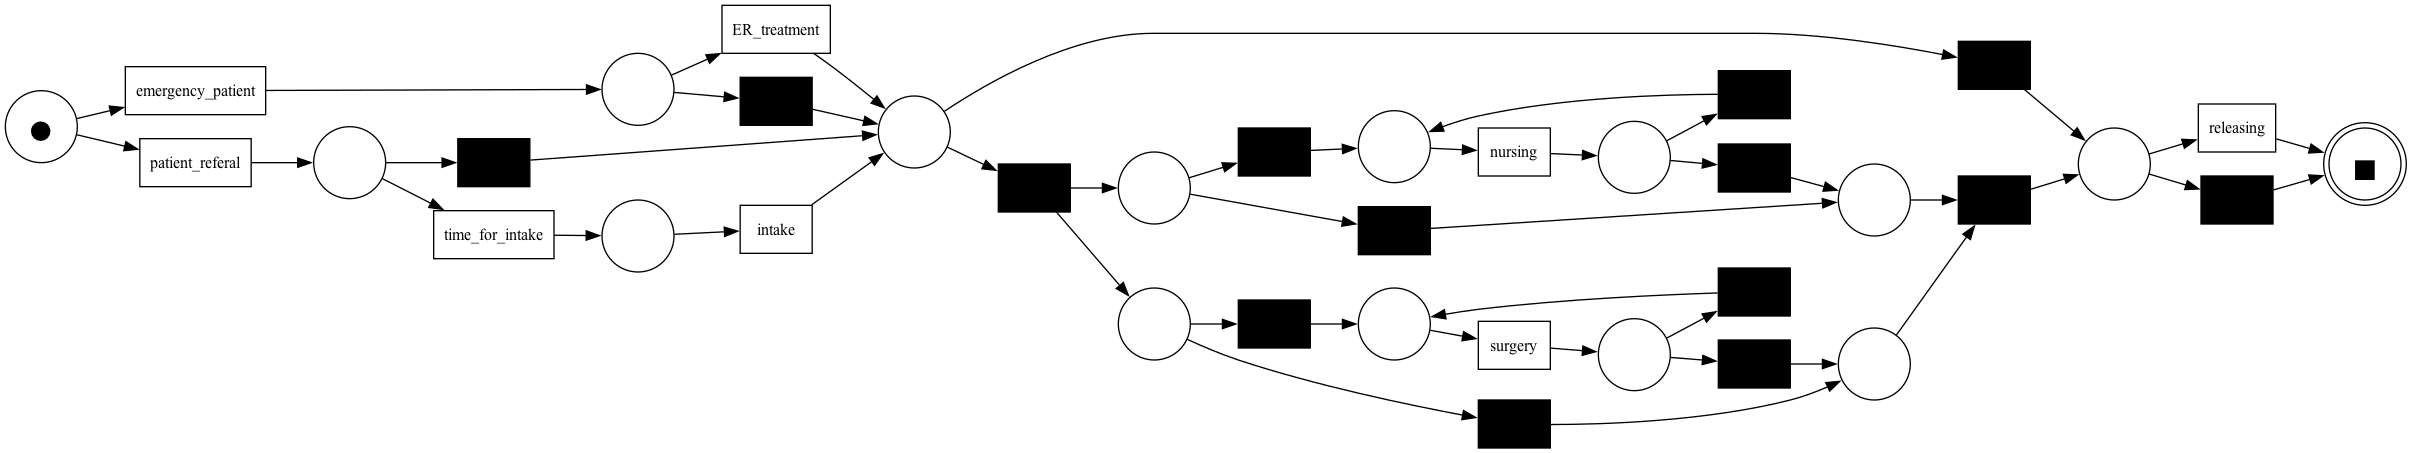

In [10]:
import pm4py
from pm4py.objects.conversion.log import converter as log_converter

event_log = log_converter.apply(df)

# Inductive Miner – robust for real logs
tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_graph = pm4py.convert_to_bpmn(tree)
pm4py.view_bpmn(bpmn_graph)   # shows an interactive BPMN diagram

# If you prefer a Petri net:
net, im, fm = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, im, fm)
